# Ejercicio 1


**Teniendo en cuenta el proyecto que has definido en la PEC1, ¿creéis que los métodos de agregación son el método más adecuado para conseguir alguno de los objetivos que os habéis propuesto? Justifica adecuadamente la respuesta.**

**Si la respuesta es no, proponer un nuevo proyecto donde si sea adecuado usar modelos de agregación.**



La PEC1 planteaba el problema del customer churn en una empresa de servicios financieros.El problema inicialmente se atacaba a través de un método supervisado para clasificar a los clientes que se encontraran en unos meses en situación de baja del servicio en función a unas características comunes.

Un modelo de clustering es un modelo de agregación que pretende encontrar patrones comunes en un dataset para generar grupos(clusters) con caracteristicas comunes. El clustering es un metodo no supervisado porque utiliza un dataset donde previamente no se le ha entrenado con etiquetas ya conocidas.

En algunos contextos, como el de la minería de datos, se lo considera una técnica de aprendizaje no supervisado puesto que busca encontrar relaciones entre variables descriptivas pero no la que guardan con respecto a una variable objetivo.

En el mundo del marketing se utiliza para identificar con hábitos de conducta similares. Agrupamiento jerárquico, que puede ser aglomerativo o divisivo.

Agrupamiento no jerárquico, en los que el número de grupos se determina de antemano y las observaciones se van asignando a los grupos en función de su cercanía.

Existen los métodos de k-mean y k-medoid.Existen diversas implementaciones de algoritmos concretos. Por ejemplo, el de las k-medias, de particionamiento. Es uno de los más antiguos pero uso extendido a pesar de sus carencias y falta de robustez.

 
Por lo tanto, en el caso de la PEC1, podríamos aplicar el clustering para poder encontrar patrones comunes en los clientes que han abandonado el servicio o, a la inversa, encontrar patrones en clientes que permanecen en el servicio.

No podemos utilizar el modelo de clustering para predecir qué clientes se darán de baja pero sí podemos encontrar patrones entre ellos y como se agrupan.

Por lo tanto, el objetivo de la PEC1 no se puede conseguir con el clustering pero si podemos aplicar modelos no supervisados como compenentes principales para reducir la dimensionalidad.PCA nos puede ayudar de forma más eficiente a encontrar algún patron entre los clientes que han abandonado el servicio y poder llegar a predecir que situación o variable genera ese customer churn.



# Ejercicio 2

**Tomando como punto de partida los ejemplos mostrados, realizar un estudio similar con otro conjunto de datos. Pueden ser datos reales de vuestro ámbito laboral o de algún repositorio de datos de Internet. Mirad por ejemplo: http://www.ics.uci.edu/~mlearn/MLSummary.html.**

**A la hora de elegir la base de datos ten en cuenta que sea apropiada para problemas no supervisados y que los atributos sean también apropiados para su uso con el algoritmo kmeans.**

**No hay que olvidarse de la fase de preparación y análisis de datos.**

## Análisis del "dataset wine" con el modelo de KMeans para generar clusters

Importamos, en primer lugar, las dependencias necesarias para desarrollar el análisis del dataset.Las librerias pandas
nos sirven para crear dataframes y manipularlos. 

El dataset wine lo he escogido porque era un conjunto de datos que agrupaba las observaciones en 3 diferentes tipos de vinos
y el total de observaciones eran númericas. De este modo, nos evitamos generar get_dummies() o codificar los valores categóricos. Además, es un dataset no demasiado extenso que nos permite jugar con modelos de forma ágil.


In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importamos el archivo
df = pd.read_csv('C:\\Users\\noelg\\Documents\\Python\\UOC\\Mineria de datos\\PEC4\\features.txt', sep= ',')

In [4]:
#Mostramos el encabezamiento del dataset para observar los valores
print(df.head())

   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [5]:
#Asignamos las columnas a cada una de las columnas para estudiarlas más adecuadamente.

df.columns=['winetype','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',
              'Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity',
              'Hue','OD280/OD315 of diluted wines','Proline']

## Preprocesamiento

En este punto, vamos a proceder a preparar el dataset para ser adaptado a un modelo de Kmeans y, consiguientemente, haremos
el analisis necesario para comprobar que es adecuado. El módelo KMeans funciona con datasets númericos y sin valores nul. 

In [6]:
#Mostramos la cantidad de observaciones y columnas, 177 y 14 respectivamente.

print(df.shape)

(177, 14)


In [7]:
#esta función nos permite conocer el tipo de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
winetype                        177 non-null int64
Alcohol                         177 non-null float64
Malic acid                      177 non-null float64
Ash                             177 non-null float64
Alcalinity of ash               177 non-null float64
Magnesium                       177 non-null int64
Total phenols                   177 non-null float64
Flavanoids                      177 non-null float64
Nonflavanoid phenols            177 non-null float64
Proanthocyanins                 177 non-null float64
Color intensity                 177 non-null float64
Hue                             177 non-null float64
OD280/OD315 of diluted wines    177 non-null float64
Proline                         177 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.4 KB
None


In [8]:
#Aqui apreciamos la cantidad de observaciones de 'winetype' que nos indica las 3 clases de vinos que se recogen.
#Este primer calculo nos ayudará a posteriori a analizar el resultado del modelo

pd.value_counts(df['winetype'])

2    71
1    58
3    48
Name: winetype, dtype: int64

In [9]:
#Extraemos las características en x y dejamos el winetype en y. 
x=df.iloc[:,1:14]
y=df.iloc[:,:1]

In [10]:
#Comprobamos las columnas y que se ha llevado a cabo correctamente.
print(x.columns)

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
       'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')


In [11]:
print(y.columns)

Index(['winetype'], dtype='object')


In [12]:
#En este punto, realizamos una tarea imortante en preprocesamiento y que he considerado necesaria para el modelo KMeans:
#comprobar si habían valores nulos en el dataset

print(x.isna().sum())

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [13]:
#Claramente se aprecia que no hay y, por lo tanto, podemos continuar en el análisis.
print(y.isna().sum())

winetype    0
dtype: int64


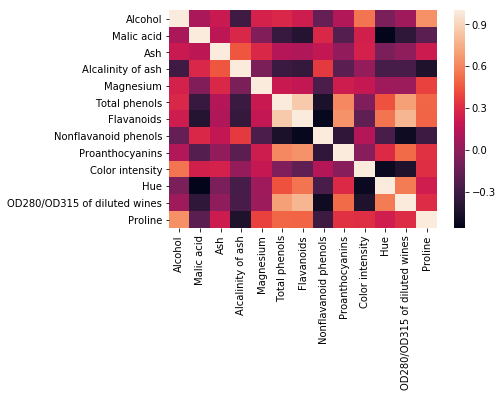

In [17]:
#Mostramos una mátriz de correlación, donde se ve claramente una correlación en variables con Flavanoids y total_phenols.
#Para ello, importaremos dos librerias esenciales en la visualización de datos y que nos ayudarán en adelante: Matplotlib y Seaborn.

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = x.corr()
sns.heatmap(corr_matrix)
plt.show()

Modelamos la correlación de estas variables a través de una regresión lineal claramente positiva

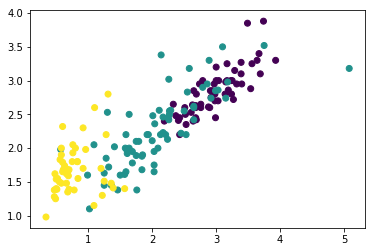

In [18]:
ax = plt.scatter(x = 'Flavanoids', y = 'Total phenols', c='winetype', data=df)
plt.show()

Aquí representamos en un scatter plot también diferentes variables para analizar hasta que punto son correlativas y claramente en Flavanoids y Color Intensity no siendo tan significativa que la anterior.

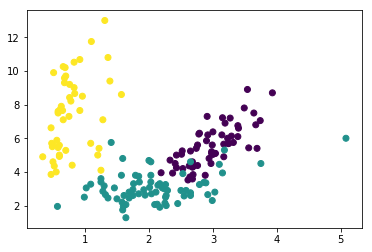

In [19]:
ax = plt.scatter(x = 'Flavanoids', y ='Color intensity', c='winetype', data=df)
plt.show()



## Modelado con KMeans

En esta parte, una vez analizado el dataset, pasamos a importar las dependencias necesarias para aplicar el modelo de clustering.
Las dependencias utilizadas son la libreria Sklearn y sus funciones KMeans y scale.Ésta última la aplicaremos para normalizar los valores ya que el Kmeans trabaja mejor con valores escalados y nos dará mejores resultados.

Un aspecto importante es la cantidad de clusters útilizados. Hemos optado directamente por 3 porque son la cantidad de clases que teniamos en el dataset original y es la predicción que pretendemos obtener. No obstante, cabe destacar que existen situaciones donde es conveniente hacer un cálculo del número de clusters adecuado para el conjunto de datos.
Este cáculo lo haremos a continuación viendo que el "codo" de la gráfica cae justamente en 3 clusters.

In [87]:
#llamamos a la librerias y sus funciones
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

#sacamos los valores donde pueden haber clusters entre 1 y 15
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
#Instanciamos el módelo
    model = KMeans(n_clusters=k)
    model = model.fit(x)
    Sum_of_squared_distances.append(model.inertia_)

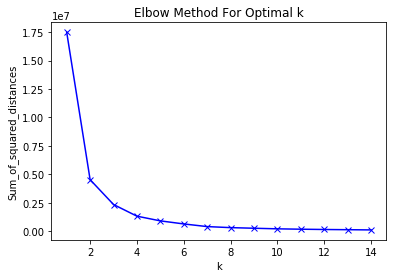

In [88]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.show()

In [20]:
#Una vez cálculados los 3 clusters procedemos a instanciarlo con 3 de forma adecuada.
#Instanciamos el modelo con 3 clusters
model = KMeans(n_clusters=3)

#Adaptamos el modelo al dataset y lo escalamos.
model.fit(scale(x))

#Aplicamos el modelo para ver los labels que produce.
predY = model.predict(scale(x))

In [21]:
#volvemos a mostrar la suma de las variables anteriores comparandolo con los labels que han resultado.
#Apreciamos que claramente hay un cierto parecido.

print(pd.value_counts(predY))
print(pd.value_counts(y['winetype']))

0    65
1    61
2    51
dtype: int64
2    71
1    58
3    48
Name: winetype, dtype: int64


In [22]:
#un punto importante y necesario(según mi parecer) es adaptar los labels resultando a la nomenclatura del dataset original
#y transformamos los 0,2,1 en 2,1,3

predY = np.choose(predY, [2, 1, 3]).astype(np.int64)

In [23]:
print(pd.value_counts(predY))
print(pd.value_counts(y['winetype']))

2    65
1    61
3    51
dtype: int64
2    71
1    58
3    48
Name: winetype, dtype: int64


## Analisis del resultado

In [27]:
#Ahora vamos a medir el resultado con la funcion m del módulo metrics de sklearn.
#El resultado claramente es muy positivo porque hemos conseguido acertar el 96% de los casos. PArece por lo tanto
#que el modelo de KMeans funciona satsifactoriamente en este dataset.

import sklearn.metrics as sm

sm.accuracy_score(y, predY)

0.9661016949152542

In [31]:
#Aqui mostramos una mátriz de confusión para analizar el resultado más detenidamente.

confusion_matrix = sm.confusion_matrix(y, predY)

list1 = ["Actual 1", "Actual 2", "Actual 3"]
list2 = ["Predicted 1", "Predicted 2", "Predicted 3"]
pd.DataFrame(confusion_matrix, list1,list2)

,Predicted 1,Predicted 2,Predicted 3
Actual 1,58,0,0
Actual 2,3,65,3
Actual 3,0,0,48


### Interpretación de mátriz de confusión

L matriz de confusión es de dimensión N X N. Cada diagonal representa, para la entrada (i, i) el caso donde la predicción es i y el resultado es i también. Cualquier otra entrada fuera de la diagonal indica algún error donde la predicción fue i y el resultado es j.

### Centroids

Aqui pasaremos a calcular los centroids y ver donde exactamente ha situado el modelo los centros del los 3 clusters y comparar el dataset original con el resultado. Para ello, vamos a coger dos variables con poca correlación y el color lo pondremos en función de los labels originales y resultados del modelo.

In [32]:
centers = np.array(model.cluster_centers_)

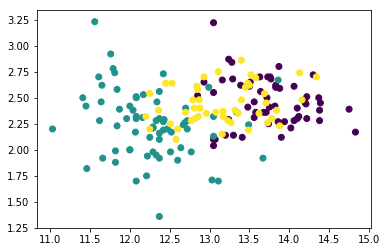

In [33]:
#Scatter plot original
ax = plt.scatter(x = 'Alcohol', y = 'Ash', c='winetype', data= df)
plt.show()

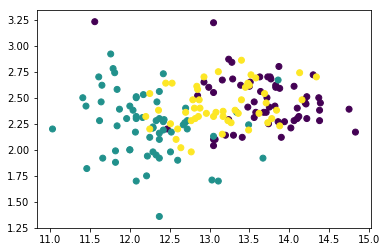

In [34]:
#Scatter plot con los datos resultantes del modelo
ax = plt.scatter(x = 'Alcohol', y = 'Ash', c=predY, data=df)
plt.show()

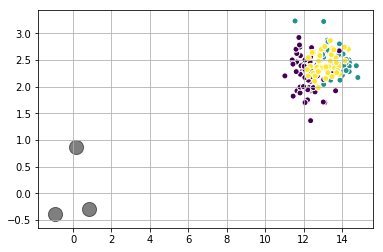

In [35]:
#Mostramos el dataset original y los centroids que se han producido, apreciando que se alejan de los cluster originales.
ax = plt.scatter(x = 'Alcohol', y = 'Ash', c=model.labels_, edgecolors='white', data=df)
plt.grid()
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.show()

## Optimización del modelo Kmeans

En esta parte, a la vista de los resultados, hemos decidido probar nuevos métodos y vamos a aplicar un MiniBatchKmeans. Es un modelo que de forma iterativa genera epochs que van aplicandose al dataset para dar un resultado más ajustado y que puede que funcione mejor con nuestro dataset.

In [36]:
from sklearn.cluster import KMeans, MiniBatchKMeans

#Instanciamos el modelo con 3 clusters
mb_model = MiniBatchKMeans(n_clusters=3)

#Lo adaptamos al dataset
mb_model.fit(x)

#Ejecutamos la predicción y lo escalamos
pred_mb_y= mb_model.predict(scale(x))

In [51]:
#Apreciamos claramente en este paso, a simple vista, que ya mejora los resultados del cluster anterior.

print(pd.value_counts(mb_model.labels_))
print(pd.value_counts(y['winetype']))

0    69
2    62
1    46
dtype: int64
2    71
1    58
3    48
Name: winetype, dtype: int64


In [52]:
mb_predY = np.choose(mb_model.labels_, [2, 1, 3]).astype(np.int64)

In [53]:
print(mb_model.labels_)

[1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1
 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1 2
 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0 0
 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2 2
 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [55]:
#Sin embargo, el score no parece ser tan bueno como el anterior. No acabamos de entender por uqé pero sale peor a pesar que
#pudiese parecer mejor.

sm.accuracy_score(y, mb_predY)

0.7005649717514124

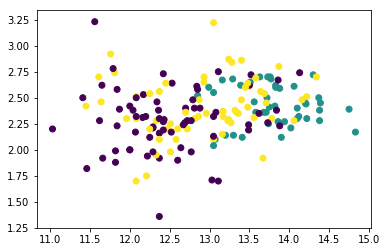

In [47]:
ax = plt.scatter(x = 'Alcohol', y = 'Ash', c= mb_model.labels_,  data=df)
plt.show()

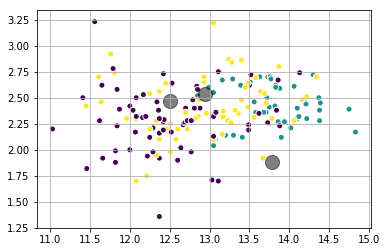

In [48]:
#En este caso, los centrois se situan cerca de los datos originales
ax = plt.scatter(x = 'Alcohol', y = 'Ash', c=mb_model.labels_, edgecolors='white', data=df)
plt.grid()
plt.scatter(mb_model.cluster_centers_[:, 0], mb_model.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.show()

In [57]:
#Aqui el modelo nos constata junto con el score que el MiniBatch no funciona tan bien como el clustering normal 
#porque se aprecia muchos más falsos positivos que en la anterior mátriz de confusión.

mb_confusion_matrix = sm.confusion_matrix(y, mb_predY)

list1 = ["Actual 1", "Actual 2", "Actual 3"]
list2 = ["Predicted 1", "Predicted 2", "Predicted 3"]
pd.DataFrame(mb_confusion_matrix, list1,list2)

,Predicted 1,Predicted 2,Predicted 3
Actual 1,45,0,13
Actual 2,1,50,20
Actual 3,0,19,29


# TERCER EJERCICIO

En este ejercicio, vamos a probar a utilizar otros modelos de agregación, aplicándolos al dataset y analizaremos los resultados para ver si son mejores o peores.

Los métodos que hemos escogido son componentes principales (PCA) y el Hierarchical Clustering. El PCA se trata de un modelo que sobretodo es utilizado para preprocesamiento ya que ayuda a encontrar patrones y las variables con mayor importancia y el hierarchical clustering es un tipo de clustering que genera una agregación en cascada como si fuera un decisión tree y va agrupando las variables entre ellas.


In [61]:
#importamos el modelo
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=3, whiten=True).fit(x)
X_pca = pca.transform(x)

In [79]:
print(pca.components_)

[[ 1.64640308e-03 -6.73503229e-04  1.94877262e-04 -4.62714440e-03
   1.74715429e-02  9.86349949e-04  1.55753482e-03 -1.22303077e-04
   5.91285826e-04  2.33005971e-03  1.70867398e-04  6.85045272e-04
   9.99830206e-01]
 [ 7.16631916e-04  2.50017789e-03  4.67090151e-03  2.87250643e-02
   9.99280105e-01  7.48473242e-04 -4.49114755e-04 -1.34284344e-03
   4.71110804e-03  1.54838007e-02 -7.97923308e-04 -4.34277343e-03
  -1.73653604e-02]
 [-1.84170346e-02 -1.21896019e-01 -5.21061389e-02 -9.38281086e-01
   3.21860468e-02  4.03572653e-02  8.48804771e-02 -1.35667976e-02
   2.40025214e-02 -2.92736147e-01  2.60722077e-02  6.84960609e-02
  -4.50343521e-03]]


In [80]:
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

[9.98107426e-01 1.71938802e-03 9.49401506e-05]
0.9999217539208701


## Interpretación

Apreciamos que el PCA ha intentado coger todo el dataset y agruparlo en 3 valores dandonos un resultado de 99% muy bueno.

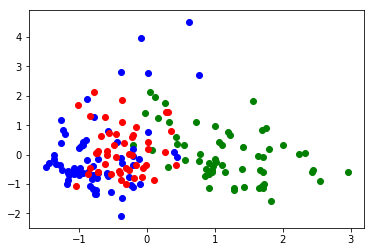

In [81]:
%matplotlib inline


colors = cycle('rgb')
target_ids = range(len(y))
pl.figure()
for i, c, label in zip(target_ids, colors, df['winetype']):
     plt.scatter(X_pca[df['winetype'] == i, 0], X_pca[df['winetype'] == i, 1],
        c=c, label=label)
plt.show()

## Agglomerative Clustering 

In [82]:
#importamos el modelo de clustering
from sklearn.cluster import AgglomerativeClustering

#Lo instanciamos con 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)  

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1], dtype=int64)

In [83]:
print(cluster.labels_)  

[0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2 0
 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0 2
 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 0 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 1 1 1 1 2 1 1 2 2 1 2 2
 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [85]:
sm.accuracy_score(y, cluster.labels_)

0.1016949152542373

Nos ha dado un resultado muy pobre en comparación con las pruebas de los modelos anteriores. Demostrando que no es el más adecuado para el dataset de vino.